In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
df = pd.read_csv("Pasion et al dataset.csv")
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [290]:
df = df.dropna()

In [291]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [293]:
df.isnull().sum()

Location         0
Date             0
Time             0
Latitude         0
Longitude        0
Altitude         0
YRMODAHRMI       0
Month            0
Hour             0
Season           0
Humidity         0
AmbientTemp      0
PolyPwr          0
Wind.Speed       0
Visibility       0
Pressure         0
Cloud.Ceiling    0
dtype: int64

In [294]:
df = df.drop(['YRMODAHRMI'], axis = 1)

In [295]:

df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [296]:
df['Location'].unique()

array(['Camp Murray', 'Grissom', 'Hill Weber', 'JDMT', 'Kahului',
       'Malmstrom', 'March AFB', 'MNANG', 'Offutt', 'Peterson', 'Travis',
       'USAFA'], dtype=object)

In [297]:
df['Location'] = df['Location'].apply(lambda x: 0 if x == 'Camp Murray' else 1 if x == 'Grisson' else 2 if x=='Hill Weber' else 3 if x=='JDMT' else 4 if x=='kahului' else 5 if x=='Malmstrom' else 6 if x == 'March AFB' else 7 if x=='MNANG' else 8 if x=='Offutt' else 9 if x=='Peterson' else 10 if x=='Travis' else 11)
df['Season'] = df['Season'].apply(lambda x: 0 if x == 'Winter' else 1 if x == 'Spring' else 2 if x == 'Summer' else 3 )

In [298]:
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,0,20171203,1145,47.11,-122.57,84,12,11,0,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,0,20171203,1315,47.11,-122.57,84,12,13,0,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,0,20171203,1330,47.11,-122.57,84,12,13,0,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,0,20171204,1230,47.11,-122.57,84,12,12,0,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,0,20171204,1415,47.11,-122.57,84,12,14,0,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [299]:
df['Location'] = df['Location'].astype(float)
df['Season'] = df['Season'].astype(float)

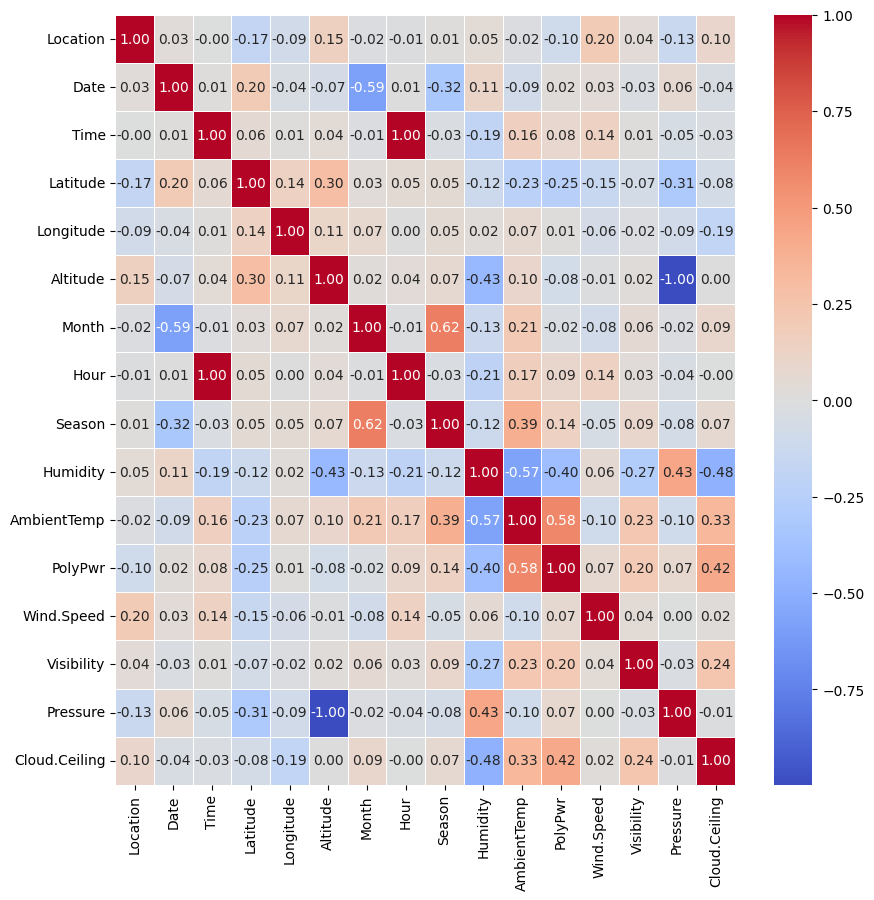

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,0.0,20171203,1145,47.11,-122.57,84,12,11,0.0,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,0.0,20171203,1315,47.11,-122.57,84,12,13,0.0,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,0.0,20171203,1330,47.11,-122.57,84,12,13,0.0,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,0.0,20171204,1230,47.11,-122.57,84,12,12,0.0,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,0.0,20171204,1415,47.11,-122.57,84,12,14,0.0,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [300]:
corr = df.corr(numeric_only=float)
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap ='coolwarm',annot=True,linewidths=0.5,fmt='.2f')
plt.show()
df.head()

In [301]:
#scatter plot to visualize the relationship between variables 
#numeric_plots = ['Location','Date','Time','Latitude','Longitude','Altitude','Month','Hour','Season','Humidity','AmbientTemp','PolyPwr','Wind.Speed','Visibility','Pressure','Cloud.Ceiling']
#sns.pairplot(df.loc[:,numeric_plots],hue='PolyPwr',diag_kind='kde',kind='scatter')
#plt.show()

In [302]:
df = df.drop(['Date','Time','Longitude','Altitude','Month','Hour','Wind.Speed','Pressure','Location'],axis=1)
df.head()

,Latitude,Season,Humidity,AmbientTemp,PolyPwr,Visibility,Cloud.Ceiling
0,47.11,0.0,81.71997,12.86919,2.42769,10.0,722
1,47.11,0.0,96.64917,9.66415,2.46273,10.0,23
2,47.11,0.0,93.61572,15.44983,4.46836,10.0,32
3,47.11,0.0,77.21558,10.36659,1.65364,2.0,6
4,47.11,0.0,54.80347,16.85471,6.57939,3.0,9


In [303]:
print(max(df['Latitude']),min(df['Latitude']))
ranlatitude = (max(df['Latitude'])-min(df['Latitude']))
EWDlatitude = ranlatitude/7
print(EWDlatitude)

47.52 20.89
3.8042857142857147


In [304]:
print(max(df['Humidity']),min(df['Humidity']))
ranHumidity = (max(df['Humidity'])-min(df['Humidity']))
EWDHumidity = ranHumidity/5
print(EWDHumidity)


99.98779 0.0
19.997558


In [305]:
print(max(df['AmbientTemp']),min(df['AmbientTemp']))
ranAmbientTemp = (max(df['AmbientTemp'])-min(df['AmbientTemp']))
EWDAmbientTemp = ranAmbientTemp/9
print(EWDAmbientTemp)

65.73837 -19.98177
9.52446


In [306]:
print(max(df['PolyPwr']),min(df['PolyPwr']))
ranPolyPwr = (max(df['PolyPwr'])-min(df['PolyPwr']))
EWDPolyPwr = ranPolyPwr/6
print(EWDPolyPwr)

34.28502 0.25733
5.671281666666666


In [307]:
print(max(df['Visibility']),min(df['Visibility']))
ranVisibility = (max(df['Visibility'])-min(df['Visibility']))
EWDVisibility = ranVisibility/4
print(EWDVisibility)

10.0 0.0
2.5


In [ ]:
print(max(df['Visibility']),min(df['Visibility']))
ranVisibility = (max(df['Visibility'])-min(df['Visibility']))
EWDVisibility = ranVisibility/4
print(EWDVisibility)

In [308]:
df['Latitude'] = df['Latitude'].apply(lambda x: 'class1[20.89-24.69]' if x >= 20.89 and x <24.69 else 'class2[24.69-28.49]' if x>=24.69 and x<28.49 else 'class3[28.49-32.29]' if x>=28.49 and x<32.29 else 'class4[32.29-36.09]' if x>=32.29 and x<36.09 else 'class5[36.09-39.89]' if x>=36.09 and x<39.89 else 'class6[39.89-43.69]' if x>=39.89 and x<43.69 else 'class7[43.69-47.52]')
df['Humidity'] = df['Humidity'].apply(lambda x: 'class1[20-40]' if x >=20 and x<40 else 'class2[40-60]' if x>=40 and x<60 else 'class3[60-80]' if x>=60 and x<80 else 'class4[80-99.98]')
df['AmbientTemp'] = df['AmbientTemp'].apply(lambda x: 'class1[-19.98--10.46]' if x>=-19.98 and x<-10.46 else 'class2[-10.46--0.94]' if x>=-10.46 and x<-0.94 else 'class3[-0.94-8.58]' if x>=-0.94 and x<8.58 else 'class4[8.58-18.1]' if x>=8.58 and x<18.1 else 'class5[18.1-27.62]' if x>=18.1 and x<27.62 else 'class6[27.62-37.14]' if x>=27.62 and x<37.14 else 'class7[37.14-46.66]' if x>=37.14 and x<46.66 else 'class8[46.66-56.18]' if x>=46.66 and x<56.18 else 'class9[56.18-65.73837]')
df['PolyPwr'] = df['PolyPwr'].apply(lambda x: 'class1[0.25-5.93]' if x>=0.25733 and x< 5.93 else 'class2[5.93-11.59]' if x>=5.93 and x<11.59 else 'class3[11.59-17.27]' if x>=11.59 and x<17.27 else 'class4[17.27-22.94]' if x>=17.27 and x<22.94 else 'class5[22.94-28.612]' if x>=22.94 and x<28.612 else 'class6[28.612-34.285]')
df['Visibility'] = df['Visibility'].apply(lambda x: 'class1[0-2.5]' if x>=0 and x<2.5 else 'class2[2.5-5]' if x>=2.5 and x<5 else 'class3[5-7.5]' if x>=5 and x<7.5 else 'class4[7.5-10]')
df.head()


,Latitude,Season,Humidity,AmbientTemp,PolyPwr,Visibility,Cloud.Ceiling
0,class7[43.69-47.52],0.0,class4[80-99.98],class4[8.58-18.1],class1[0.25-5.93],class4[7.5-10],722
1,class7[43.69-47.52],0.0,class4[80-99.98],class4[8.58-18.1],class1[0.25-5.93],class4[7.5-10],23
2,class7[43.69-47.52],0.0,class4[80-99.98],class4[8.58-18.1],class1[0.25-5.93],class4[7.5-10],32
3,class7[43.69-47.52],0.0,class3[60-80],class4[8.58-18.1],class1[0.25-5.93],class1[0-2.5],6
4,class7[43.69-47.52],0.0,class2[40-60],class4[8.58-18.1],class2[5.93-11.59],class2[2.5-5],9
